<img src='imgs/fb_nvidia_elastic.jpg' width='500'>

# AI Indexing

# <u>Object & HTTP </u> Images
# <u>File / NFS</u> Index
# <u>PSO </u> NVIDIA / Elastic Containers

# Sample Bond

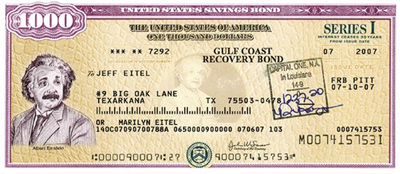


determine bond series...


'is EE'

False

'100.0'


determine bond value...


1000

100.0

find owner name...


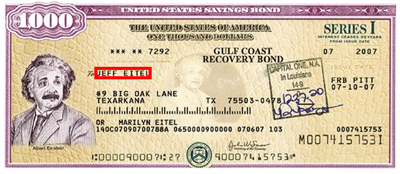



determine owner name...
Looking for /Users/whill/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/whill/.keras-ocr/crnn_kurapan.h5


first name:jeff
last name:eitel


index the image...
2020-06-05 09:56:02.256994
{'_index': 'tbonds', '_type': '_doc', '_id': 'img_name', '_version': 4, 'result': 'updated', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1003, '_primary_term': 1}


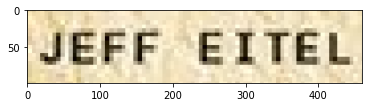

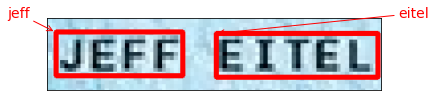

In [42]:
from PIL import Image, ImageDraw
img_dir = 'tbond_imgs/'
img_name = '1000_jeff_eitel_lrg.png'
img = img_dir + img_name

basewidth = 400
bond_img = Image.open(img)
wpercent = (basewidth/float(bond_img.size[0]))
hsize = int((float(bond_img.size[1])*float(wpercent)))
display(bond_img.resize((basewidth,hsize), Image.ANTIALIAS))
########################################################################################## 
print('\ndetermine bond series...')
series_prediction = !curl -s http://ds:5000/models/images/classification/classify_one/json -XPOST \
        -F job_id=20200602-173015-1c9c \
        -F image_file=@{img}
max_idx = np.array(json.loads(series_prediction[0])['predictions'])[:,1].argmax()
isEE = 'EE' == np.array(json.loads(series_prediction[0])['predictions'])[max_idx,0]
isEE_confidence = np.array(json.loads(series_prediction[0])['predictions'])[max_idx,1]
display('is EE', isEE, isEE_confidence)
##########################################################################################
print('\ndetermine bond value...')
import json; import numpy as np
value_prediction = !curl -s http://ds:5000/models/images/classification/classify_one/json -XPOST \
        -F job_id=20200602-210626-a683 \
        -F image_file=@{img}

max_idx = np.array(json.loads(value_prediction[0])['predictions'])[:,1].argmax()
bond_val = int(np.array(json.loads(value_prediction[0])['predictions'])[max_idx,0])
bond_val_confidence = float(np.array(json.loads(value_prediction[0])['predictions'])[max_idx,1])
display(bond_val, bond_val_confidence)
##########################################################################################
print('find owner name...')
x=760; w=460;
y=540; h=100

import cv2
from matplotlib import pyplot as plt

annotated = Image.open(img)
ImageDraw.Draw(annotated) .rectangle([x,y,x+w,y+h],  outline ="red", width=25) 
wpercent = (basewidth/float(annotated.size[0]))
hsize = int((float(annotated.size[1])*float(wpercent)))
display(annotated.resize((basewidth,hsize), Image.ANTIALIAS))

name_img = cv2.imread(img)[y:y+h, x:x+w]
plt.imshow(name_img[:,:,::-1])
##########################################################################################
print('\n\ndetermine owner name...')
import keras_ocr
name_data = keras_ocr.pipeline.Pipeline(scale=1).recognize([name_img])[0]
keras_ocr.tools.drawAnnotations(image=name_img, predictions=name_data, ax=None)
first_name = name_data[0][0]
last_name = name_data[1][0]
print('\n\nfirst name:' + first_name)
print('last name:'+ last_name)
##########################################################################################
print('\n\nindex the image...')
from elasticsearch import Elasticsearch 
es=Elasticsearch([{'host':'localhost','port':9200}])
tbond={
    "isEE":isEE, 
    "isEE_confidence":isEE_confidence,
    "bond_val":bond_val, 
    "bond_val_confidence":bond_val_confidence,
    "owner_last":last_name,
    "owner_first":first_name,
    "img":img_name,
    "url":"http://ds:9000/series/not_EE/1000_jeff_eitel_lrg.png",
}

import time
import threading
from datetime import datetime as dt
print(dt.now())
time.sleep(20)
x = threading.Thread(target=print(es.index(index='tbonds', id='img_name', body=tbond)))
x.start()    

http://localhost:5601

<img src='imgs/docker.png' width=400 align='left' />  

### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

<img src='imgs/nvidia.png' width=400 align='left' />

__docker__  
    run --gpus all -it --rm  
    -p 5000:5000  
    -v ${PWD}/bond_imgs:/bond_imgs  
    --name digits  
    __nvcr.io/nvidia/digits:20.03-caffe-py3__

http://localhost:5000/models/20200602-210626-a683  
http://localhost:5000/models/20200602-173015-1c9c

<img src='imgs/elastic.png' align='left' width=400/>  

__docker__ 
            run -d                                            \
            --name elasticsearch                              \
            -h elasticsearch                                  \
            -p 9200:9200                                      \
            -p 9300:9300                                      \
            -e "discovery.type=single-node"                   \
            __elasticsearch__:7.7.0  

http://localhost:9200

<img src='imgs/kibana.png' width=400 align='left'/>

__docker__ 
            run -d                              \
            --name kibana                       \
            -p 5601:5601                        \
            -h kibana                           \
            --link elasticsearch:elasticsearch  \
            __kibana__:7.7.0  
  
http://localhost:5601